In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./input/USA_field_society_2019_v2.csv')
df

,mean_square_of_filed(sq.hectare),number_of_days_watered(percentage),pest_ratio,annual_fee,lost_profit(percentage),private/public
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


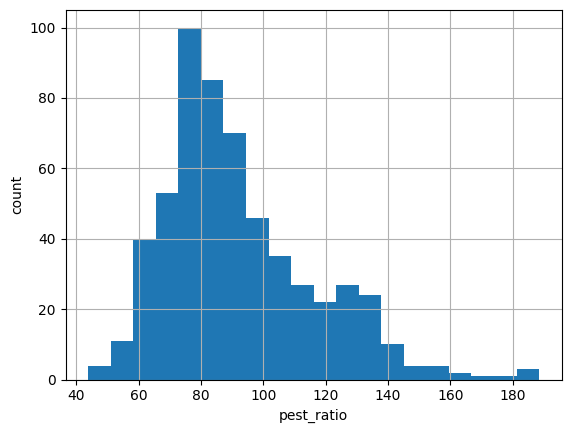

In [4]:
# визуализируем данные
df['pest_ratio'].hist(bins=20)
plt.xlabel('коэффициент вредителей')
plt.ylabel('число')
plt.show()

In [ ]:
# неожиданное начало распределение нельзя назвать обычным, значит корреляция с целевой переменной будет низкой
# проверим это

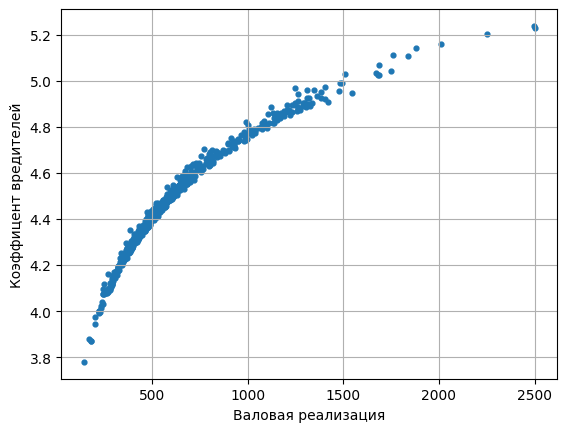

In [5]:
xs = df['annual_fee']
ys = df['pest_ratio'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Валовая реализация')
plt.ylabel('Коэффицент вредителей')
plt.show()

In [ ]:
# прямая и очень сильная корреляция, судя по графику валовая реализация и коэффициент вредителей 
# имеют прямую зависимость

In [6]:
from scipy.stats.stats import pearsonr
pearsonr(df['annual_fee'], df['pest_ratio'])

C:\Users\aleks\AppData\Local\Temp\ipykernel_18344\2112727565.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.9865068039913898, pvalue=0.0)

In [ ]:
# Корреляция Пирсона сумашедшие 98% - это очень сильная зависимость, а тут возникает логический вопрос
# как такое возможно? Ведь вредители не могут влиять на валовую реализацию, а валовая реализация
# не может влиять на вредителей. 

# Могу предположить, что вредители могут влиять на валовую реализацию, но не напрямую, а через
# какие-то другие факторы, например, через площадь урожая, которая в свою очередь может влиять на
# валовую реализацию. Проверим это

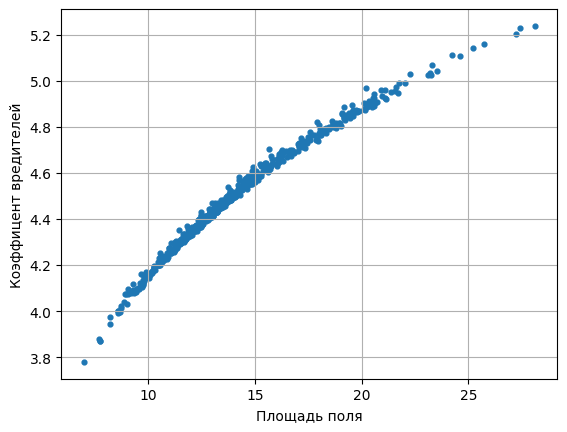

In [7]:
xs = df['mean_square_of_filed(sq.hectare)']
ys = df['pest_ratio'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Площадь поля')
plt.ylabel('Коэффицент вредителей')
plt.show()

In [ ]:
# Ну вот теперь все встает на свои места - коэффициент вредителей и площадь поля имеют прямую зависимость
# Значит этот коэффицент не привязан к одному конкретному метру поля, а зависит от общей площади поля
# и вредителей на нем.

# Данные прям стерилизованы, и уже сейчас понятно, что вредителей нейронка примет как хороший признак
# И наоборот будет всеми силами увеличивать их число - ведь корреляция между вредителями и валовой
# реализацией очень сильная.

# Значит придется идти от обратного - уменьшать вредителей, чтобы увеличить валовую реализацию.
